## CIIC5018 / ICOM5018
## Network Security and Cryptography
## Project 6: RC4 Implementation
### Francis Jose Patron Fidalgo (802180833)
### sec: 060
### --/--/2022

In [581]:
import matplotlib.pyplot as plt
from timeit import default_timer as timer

In [582]:
class RC4:
    def __init__(self, key):
        self.s = list(range(256))
        self.t = [None]*256
        self.j = 0
        self.i = 0
        self.key = key

        # support for bytes in string
        if type(key) is str:
            key = [int(key[i:i+2], 16) for i in range(0, len(key), 2)]

        # initialization
        for i in range(256):
            self.t[i] = key[i % len(key)]

        # initial permutation of s
        j = 0
        for i in range(256):
            j = (j + self.s[i] + self.t[i]) % 256
            self.s[i], self.s[j] = self.s[j], self.s[i]

    def _next_code(self):
        # Stream Generation
        self.i  = (self.i + 1) % 256
        self.j = (self.j + self.s[self.i]) % 256
        self.s[self.i], self.s[self.j] = self.s[self.j], self.s[self.i]
        self.t = (self.s[self.i] + self.s[self.j]) % 256
        return self.s[self.t]

    def _xor_code(self, byte):
        return '{:02x}'.format(byte ^ self._next_code())

    def enc_dec_array(self, bytes):
        # support for bytes in string
        if type(bytes) is str:
            bytes = [int(bytes[i:i+2], 16) for i in range(0, len(bytes), 2)]
        result = ''.join([self._xor_code(b) for b in bytes])
        return result

In [583]:
def bytes2text(bytes):
    return ''.join([chr(int(bytes[i:i+2], 16)) for i in range(0, len(bytes), 2)])
def txt2bytes(txt):
    return ''.join(['{:02x}'.format(ord(c)) for c in txt])

In [584]:
def get_byte_freq(bytes):
    # support for bytes in string
    if type(bytes) is str:
        bytes = [bytes[i:i+2] for i in range(0, len(bytes), 2)]
    unique_bytes = list(dict.fromkeys(bytes))
    frequencies = []
    # position cache
    pos = {}
    for b in unique_bytes:
        frequencies.append(bytes.count(b))
    return frequencies, unique_bytes


In [585]:
def plot(freq, bytes):
    freq = freq.copy()
    sorted_freq = freq.copy()
    sorted_freq.sort(reverse=True)
    sorted_bytes = []
    for i in sorted_freq:
        sorted_bytes.append(bytes[freq.pop(freq.index(i))])
    plt.figure(figsize = (20, 10))
    bars = plt.bar(sorted_bytes, sorted_freq, color ='gray', width=0.5)
    plt.title('RC4 Encryption Byte Frequencies')
    plt.xlabel("Bytes")
    plt.ylabel("Frequency")
    plt.margins(x=0, y=0)
    plt.rc('font', **{'size'   : 12})
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x(), yval + 0.05, yval)
    plt.show()


# Test

In [591]:
# the states before and after generating a random byte
rc4 = RC4(txt2bytes('incredible secure key'))
print(rc4.s)
print(rc4.i)
print(rc4.j)
num = rc4._next_code()
print(rc4.s)
print(rc4.i)
print(rc4.j)

[218, 139, 61, 178, 27, 4, 243, 92, 187, 62, 211, 175, 87, 167, 41, 170, 40, 253, 238, 102, 127, 70, 245, 163, 249, 119, 101, 88, 75, 0, 236, 43, 223, 68, 201, 246, 108, 129, 13, 176, 151, 82, 98, 168, 9, 37, 96, 252, 73, 116, 198, 100, 3, 90, 26, 5, 11, 220, 124, 45, 120, 188, 19, 74, 60, 185, 134, 16, 113, 191, 79, 22, 38, 148, 115, 35, 64, 159, 146, 99, 81, 114, 142, 54, 52, 117, 29, 172, 46, 58, 10, 103, 194, 44, 215, 141, 67, 224, 48, 189, 94, 184, 55, 23, 7, 12, 109, 126, 152, 30, 86, 53, 128, 165, 254, 177, 56, 235, 196, 136, 125, 71, 95, 8, 123, 239, 59, 1, 50, 214, 6, 251, 193, 31, 135, 154, 85, 15, 107, 133, 110, 93, 25, 21, 47, 242, 160, 156, 158, 240, 231, 227, 18, 69, 14, 192, 147, 2, 65, 72, 229, 131, 203, 111, 77, 226, 144, 199, 202, 206, 219, 248, 42, 205, 250, 230, 89, 157, 63, 166, 204, 200, 169, 182, 118, 20, 217, 83, 228, 106, 241, 181, 137, 80, 171, 28, 121, 209, 150, 138, 39, 155, 143, 221, 244, 161, 234, 84, 34, 233, 122, 104, 149, 32, 186, 17, 195, 145, 105, 162

In [593]:
key = txt2bytes('incredible secure key')

#  Use the same key string to initialize two RC4 objects (RC4-E, RC4-D)
rc4_E = RC4(key)
rc4_D = RC4(key)
# Converting a sting of text (S1) to an array of bytes (A1)
s1 = 'never under-estimate the power of the scouts code' 
a1 = txt2bytes(s1)
print(f'A1 = {a1}')
# Encrypt A1 using RC4-E and get array A2
a2 = rc4_E.enc_dec_array(a1)
print(f'A2 = {a2}')
# Decrypt A2 using RC4-D and get array A3
a3 = rc4_D.enc_dec_array(a2)
print(f'A3 = {a3}')
# Covert A3 to a string (S2), which shall the same as S1
s2 = bytes2text(a3)
print(f'S1 = {s1}')
print(f'S2 = {s2}')

A1 = 6e6576657220756e6465722d657374696d6174652074686520706f776572206f66207468652073636f75747320636f6465
A2 = 463b8bcae6c0150cc12dea64ffedb9c46891103051ad5d4b7286430546f4dc47f17c041c3019c5c105ada643055422e0fb
A3 = 6e6576657220756e6465722d657374696d6174652074686520706f776572206f66207468652073636f75747320636f6465
S1 = never under-estimate the power of the scouts code
S2 = never under-estimate the power of the scouts code


# Frequency & Encryption

In [588]:
text = '''CIIC5018 / ICOM5018
Network Security and Cryptography
Overview
Project 6 – RC4 and Stream Cipher
In this project, you will need to design and implement RC4 and a stream cipher,
and then compare the frequency of characters in the plaintext and cyphertext. The
programming language is Python and the programming platform is Jupyter
notebook.
Document requirements
To work on the exercise, you will need to prepare three documents following the
guidelines below.
1.Adesigna.b.c.d.e.f.document
Cover page
i. It shall include the title of the document, your name, student
ID, department and university information, etc.
Table of content
Section 1: The RC4 class
i. The class shall store the following values
1. The state S is an array of 256 integers, each integer is
in range [0, 255]
2. Parameter i
3. Parameter j
ii. The class shall contain the following functions
1. Initializer
2. Next_code
3. XOR_code
4. EncDec_array
Section 2: The initializer of the RC4 class
i. To initialize an RC4 object, you need to use a key that
contains up to 256 bytes
ii. The initializer must initialize S, i, j according to the standard
Section 3: Next_code
i. This function returns a new random integer in range [0, 255]
ii. The internal values will be updated
iii. All procedures must follow the standard
Section 4: XOR_Code
i. This function encrypt/decrypt an input byte by XOR it with a
new code returned by Next_code
ii. The return is an integer in range [0, 255]
g. Section 5: EncDec_array
i. This function encrypt/decrypt a whole array of bytes
ii. The input is an array of integers
iii. The output is an array of integers after calling XOR_Code for
each byte
h. References
i. At least 5 references
ii. Including a link to your YouTube video.
2. A Python program saved in one Jupyter notebook file
a. The RC4 class and all functions shall be implemented using Python.
b. You shall demonstrate the initial permutation of state
c. You shall demonstrate (state, i, j) before and after generating a
random byte
d. To verify your stream cipher, you must do the following
i. Use the same key string to initialize two RC4 objects (RC4-E,
RC4-D)
ii. Converting a sting of text (S1) to an array of bytes (A1)
iii. Encrypt A1 using RC4-E and get array A2
iv. Decrypt A2 using RC4-D and get array A3
v. Covert A3 to a string (S2), which shall the same as S1
e. Use this document as a string to generate an array of bytes for
ciphertext, then use the previous code to show the frequency of 256
bytes.
f. Determine the time to encrypt one character.
i. You can record the total time to encrypt a large txt file, then
divide the total amount of time by the total number of
characters in the file.
3. A Youtube video to walk through your code
a. In the video, you shall go through Step 2.b to demonstrate the initial
permutation of state
b. In the video, you shall go through Step 2.c to demonstrate the states
before and after generating a random byte
c. In the video, you shall go through Step 2.d to demonstrate the
correctness of your stream cipher
d. In the video, you shall go through Step 2.e to show the frequency of
bytes after using the stream cipher to encrypt a string of text
e. In the video, you shall go through Step 2.f to show the time for
encrypting a single character.
f. Upload the video to youtube, set the video as private, then share it
to me (Kejie.lu@upr.edu)
Submission
Submit a single zip file that includes:
1. the design document
2. the Jupyter notebook
Evaluation
1. Rubrics are used in the evaluation.
2. You must carefully review all rubrics before preparing for the documents.'''

total exec time = 0.004184863999398658 seconds
exec time per byte = 5.841518703794888e-07 seconds


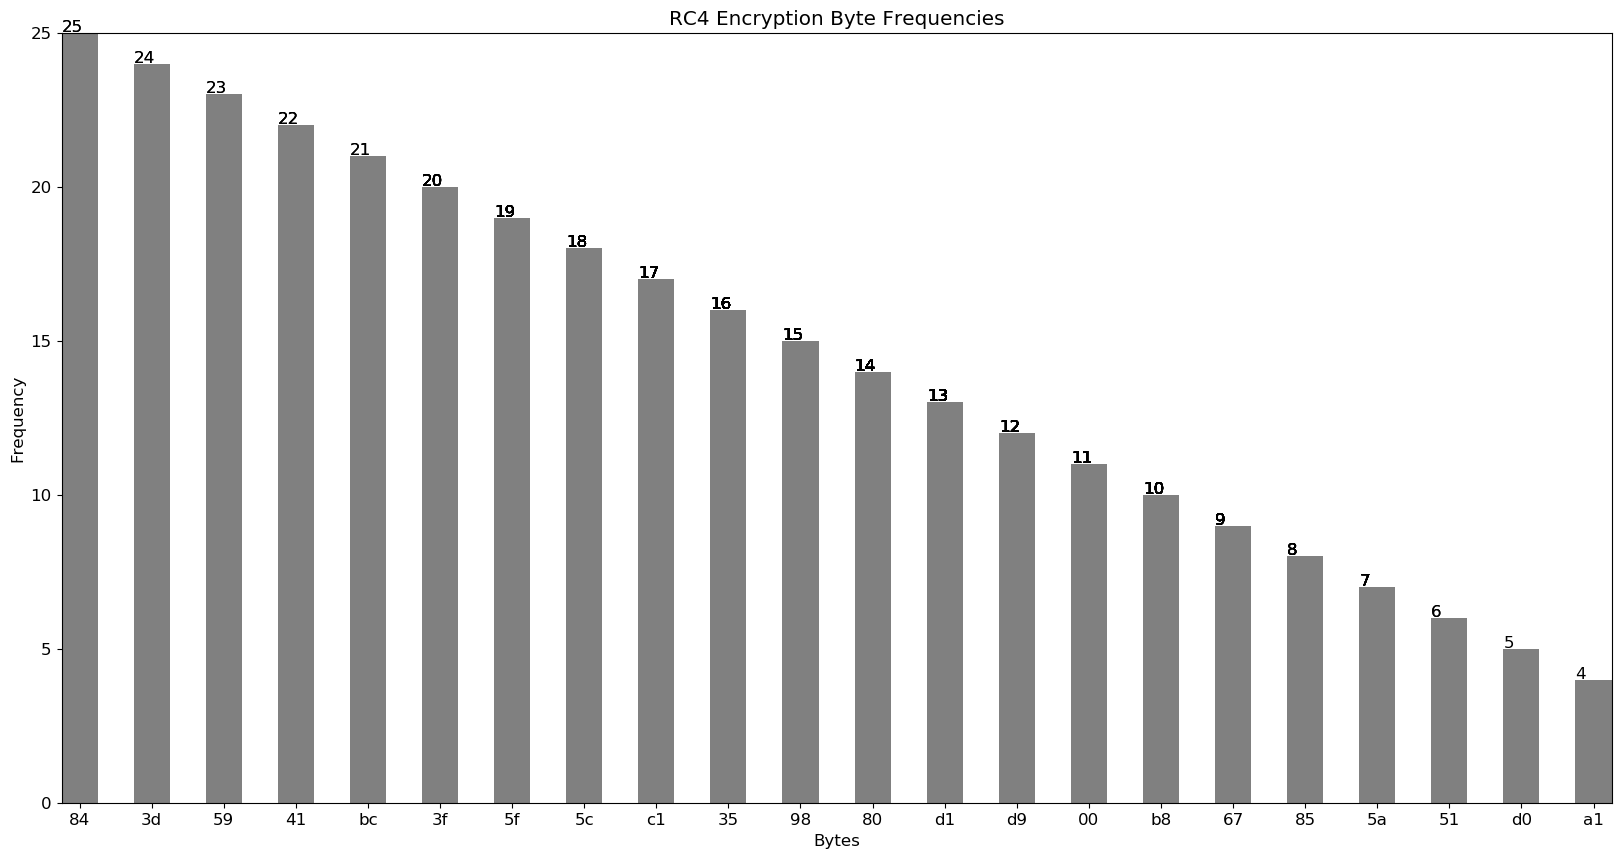

In [589]:
text_bytes = txt2bytes(text)

start_time = timer()
encrypted_text = RC4(key).enc_dec_array(text_bytes)
end_time = timer()

total_time = end_time - start_time
exec_time_per_byte = total_time / len(text_bytes)
print(f'total exec time = {total_time} seconds')
print(f'exec time per byte = {exec_time_per_byte} seconds')

byte_freq, bytes = get_byte_freq(encrypted_text)

plot(byte_freq, bytes)